**Importing Modules and Necessary Features**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,ConfusionMatrixDisplay
import joblib


**Loading the Dataset to Get the First Impressions about Data**

In [2]:
Supply_Chain_Data=pd.read_csv('Data/Supply_Chain_Main_Data.csv', sep = ';', low_memory=False)
Supply_Chain_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94460 entries, 0 to 94459
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transport Order id                        94460 non-null  object 
 1   Loading_meter [ldm]                       94460 non-null  object 
 2   Gross_weight [kg]                         94460 non-null  object 
 3   Volume [m3]                               94460 non-null  object 
 4   Handling_unit_quantity [qty]              94460 non-null  int64  
 5   Billed freight weight [kg]                94460 non-null  object 
 6   Means_of_transportation                   94459 non-null  object 
 7   Carrier ID                                94457 non-null  object 
 8   Mode_of_Transportation                    94460 non-null  object 
 9   Pickup_weekday                            93508 non-null  object 
 10  Delivery_weekday                  

**Cleaning Unnecessary Information from the Dataset**

In [3]:
Supply_Chain_Data.rename(columns={'Transport Order id': 'Transport_Order_id'}, inplace=True)
Supply_Chain_Data.rename(columns={'Loading_meter [ldm]': 'Loading_meter'}, inplace=True)
Supply_Chain_Data.rename(columns={'Gross_weight [kg]': 'Gross_weight'}, inplace=True)
Supply_Chain_Data.rename(columns={'Volume [m3]': 'Volume'}, inplace=True)
Supply_Chain_Data.rename(columns={'Handling_unit_quantity [qty]': 'Handling_unit_quantity'}, inplace=True)
Supply_Chain_Data.rename(columns={'Billed freight weight [kg]': 'Billed_freight_weight'}, inplace=True)
Supply_Chain_Data.rename(columns={'Carrier ID': 'Carrier_ID'}, inplace=True)
Supply_Chain_Data.rename(columns={'Custom clearance needed': 'Custom_clearance_needed'}, inplace=True)
Supply_Chain_Data.rename(columns={'Pickup_timewindow_length [hrs]': 'Pickup_timewindow_length'}, inplace=True)
Supply_Chain_Data.rename(columns={'Delivery_timewindow_length [hrs]': 'Delivery_timewindow_length'}, inplace=True)
Supply_Chain_Data.rename(columns={'Plant Shutdown on pickup or delivery day': 'Plant_Shutdown_on_pickup_or_delivery_day'}, inplace=True)
Supply_Chain_Data.rename(columns={'Exception happened 1week ago': 'Exception_happened_1week_ago'}, inplace=True)
Supply_Chain_Data.rename(columns={'Exception happened 2weeks ago': 'Exception_happened_2weeks_ago'}, inplace=True)
Supply_Chain_Data.rename(columns={'Holiday during pickup or delivery day': 'Holiday_during_pickup_or_delivery_day'}, inplace=True)
Supply_Chain_Data.rename(columns={'distance cluster': 'distance_cluster'}, inplace=True)
Supply_Chain_Data.rename(columns={'Exception_output,,,,': 'Exception_output'}, inplace=True)


Supply_Chain_Data['Exception_output'] = Supply_Chain_Data['Exception_output'].str.replace(',', '')
Supply_Chain_Data['Pickup_weekday'] = Supply_Chain_Data['Pickup_weekday'].replace({'Dienstag': 'Tuesday', 'Freitag': 'Friday','Donnerstag': 'Thursday','Mittwoch': 'Wednesday','Samstag': 'Saturday', 'Montag': 'Monday','Sonntag': 'Sunday'})
Supply_Chain_Data['Delivery_weekday'] = Supply_Chain_Data['Delivery_weekday'].replace({'Dienstag': 'Tuesday', 'Freitag': 'Friday','Donnerstag': 'Thursday','Mittwoch': 'Wednesday','Samstag': 'Saturday', 'Montag': 'Monday','Sonntag': 'Sunday'})
Supply_Chain_Data['Means_of_transportation'] = Supply_Chain_Data['Means_of_transportation'].replace({'mega': 'Mega', 'meGa': 'Mega','standard': 'Standard'})
Supply_Chain_Data = Supply_Chain_Data.map(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

Supply_Chain_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94460 entries, 0 to 94459
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transport_Order_id                        94460 non-null  object 
 1   Loading_meter                             94460 non-null  object 
 2   Gross_weight                              94460 non-null  object 
 3   Volume                                    94460 non-null  object 
 4   Handling_unit_quantity                    94460 non-null  int64  
 5   Billed_freight_weight                     94460 non-null  object 
 6   Means_of_transportation                   94459 non-null  object 
 7   Carrier_ID                                94457 non-null  object 
 8   Mode_of_Transportation                    94460 non-null  object 
 9   Pickup_weekday                            93508 non-null  object 
 10  Delivery_weekday                  

**Preprocessing of the Dataset for the Model**

In [4]:
# Part 1 : Converting Categorical Data to Numerical Data

Supply_Chain_Data['Consignor_country'] = Supply_Chain_Data['Consignor_country'].replace({'AT':'1','BE':'2','BG':'3','CH':'4','CZ':'5','DE':'6','ES':'7','FR':'8','GB':'9','HU':'10','IT':'11','L':'12','LU':'13','MA':'14','MD':'15','MK':'16','NL':'17','PL':'18','PT':'19','RO':'20','RS':'21','RU':'22','SE':'23','SI':'24','SK':'25','TR':'26','UA':'27'})
Supply_Chain_Data['Recipient_country'] = Supply_Chain_Data['Recipient_country'].replace({'AT':'1','BE':'2','BG':'3','CH':'4','CZ':'5','DE':'6','ES':'7','FR':'8','GB':'9','HU':'10','IT':'11','L':'12','LU':'13','MA':'14','MD':'15','MK':'16','NL':'17','PL':'18','PT':'19','RO':'20','RS':'21','RU':'22','SE':'23','SI':'24','SK':'25','TR':'26','UA':'27'})

Supply_Chain_Data = Supply_Chain_Data.loc[Supply_Chain_Data['Delivery_timewindow_length'] != '#NAME?']
Supply_Chain_Data = Supply_Chain_Data.loc[Supply_Chain_Data['Pickup_timewindow_length'] != '#NAME?']

Supply_Chain_Data = Supply_Chain_Data.drop(['Transport_Order_id','Carrier_ID'], axis=1)


Supply_Chain_Data['Means_of_transportation'] = Supply_Chain_Data['Means_of_transportation'].replace({'Mega':'1','Standard':'2', 'Jumbo':'3', 'Jumbo Swap Body':'4', 'Mega Box':'5',
 'High Cube Container':'6', 'Truck 7.5to':'7', 'Transporter 3.5to':'8', 'Top shifter':'9',
 'Big-Maxx':'10', 'Truck 12 to':'11', 'Big-Maxx Auflieger':'12', 'Long liner':'13',
 'Truck 7.5to nLaengeI=6.5':'14', 'Truck 5 to':'15', 'Long Gazelle RUS':'16',
 'Curtain Side Van':'17'})
Supply_Chain_Data['Mode_of_Transportation'] = Supply_Chain_Data['Mode_of_Transportation'].replace({'FTL':'1','LTL':'2','ltl':'3','MR':'4','HUB':'5','MIXED':'6'})
Supply_Chain_Data['Pickup_weekday'] = Supply_Chain_Data['Pickup_weekday'].replace({'Tuesday':'4', 'Friday':'7', 'Thursday':'6', 'Wednesday':'5','Saturday':'1', 'Monday':'3','Sunday':'2'})
Supply_Chain_Data['Delivery_weekday'] = Supply_Chain_Data['Delivery_weekday'].replace({'Tuesday':'4', 'Friday':'7', 'Thursday':'6', 'Wednesday':'5','Saturday':'1', 'Monday':'3','Sunday':'2'})
Supply_Chain_Data['Plant_Shutdown_on_pickup_or_delivery_day'] = Supply_Chain_Data['Plant_Shutdown_on_pickup_or_delivery_day'].replace({'False':'0', 'True':'1'})
Supply_Chain_Data['Exception_happened_1week_ago'] = Supply_Chain_Data['Exception_happened_1week_ago'].replace({'False':'0', 'True':'1'})
Supply_Chain_Data['Exception_happened_2weeks_ago'] = Supply_Chain_Data['Exception_happened_2weeks_ago'].replace({'False':'0', 'True':'1'})
Supply_Chain_Data['Holiday_during_pickup_or_delivery_day'] = Supply_Chain_Data['Holiday_during_pickup_or_delivery_day'].replace({'False':'0', 'True':'1'})
Supply_Chain_Data['distance_cluster'] = Supply_Chain_Data['distance_cluster'].replace({'0-50 km':'1', '50-200 km':'2', '200-500 km':'3', '500-800 km':'4', '800-1300 km':'5', '1300-1800 km':'6','>1800 km':'7'})
Supply_Chain_Data['Holiday_during_pickup_or_delivery_day'] = Supply_Chain_Data['Holiday_during_pickup_or_delivery_day'].astype(float)

Columns_To_Convert = ['Loading_meter', 'Gross_weight', 'Volume','Handling_unit_quantity', 'Billed_freight_weight','Means_of_transportation', 'Mode_of_Transportation', 'Pickup_weekday','Delivery_weekday', 'Number_of_Stops', 'Custom_clearance_needed','Pickup_timewindow_length', 'Delivery_timewindow_length','Plant_Shutdown_on_pickup_or_delivery_day','Exception_happened_1week_ago', 'Exception_happened_2weeks_ago', 'distance_cluster','Weeks_after_project_GoLive','Pickup_Month','Pickup_Year','Pickup_weeknumber','Delivery_weeknumber','Consignor_country','Recipient_country']
for Column in Columns_To_Convert:
    Supply_Chain_Data[Column] = pd.to_numeric(Supply_Chain_Data[Column], errors='coerce')


Supply_Chain_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94423 entries, 0 to 94459
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Loading_meter                             94423 non-null  float64
 1   Gross_weight                              94423 non-null  float64
 2   Volume                                    94423 non-null  float64
 3   Handling_unit_quantity                    94423 non-null  int64  
 4   Billed_freight_weight                     94423 non-null  float64
 5   Means_of_transportation                   94422 non-null  float64
 6   Mode_of_Transportation                    94423 non-null  int64  
 7   Pickup_weekday                            93471 non-null  float64
 8   Delivery_weekday                          93465 non-null  float64
 9   Consignor_country                         93437 non-null  float64
 10  Recipient_country                      

In [5]:
# Part 2 : Handling Missing Values for Categorical and Numerical Data

numeric_cols = Supply_Chain_Data.select_dtypes(include=[np.number]).columns
non_numeric_cols = Supply_Chain_Data.select_dtypes(exclude=[np.number]).columns

numeric_imputer = SimpleImputer(strategy='mean')
Numeric_Data = pd.DataFrame(numeric_imputer.fit_transform(Supply_Chain_Data[numeric_cols]), columns=numeric_cols)

non_numeric_imputer = SimpleImputer(strategy='most_frequent')
Non_Numeric_Data = pd.DataFrame(non_numeric_imputer.fit_transform(Supply_Chain_Data[non_numeric_cols]), columns=non_numeric_cols)

Supply_Chain_Data = pd.concat([Numeric_Data, Non_Numeric_Data], axis=1)
Supply_Chain_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94423 entries, 0 to 94422
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Loading_meter                             94423 non-null  float64
 1   Gross_weight                              94423 non-null  float64
 2   Volume                                    94423 non-null  float64
 3   Handling_unit_quantity                    94423 non-null  float64
 4   Billed_freight_weight                     94423 non-null  float64
 5   Means_of_transportation                   94423 non-null  float64
 6   Mode_of_Transportation                    94423 non-null  float64
 7   Pickup_weekday                            94423 non-null  float64
 8   Delivery_weekday                          94423 non-null  float64
 9   Consignor_country                         94423 non-null  float64
 10  Recipient_country                 

**Exploratory Data Analysis (EDA)**

Text(0.5, 1.0, 'Types of Exceptions')

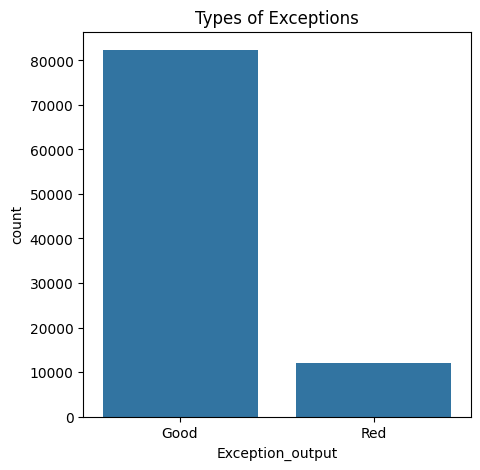

In [6]:
# Checking the Distribution of Exception Types 

To_Visualize_Data=Supply_Chain_Data.copy()

plt.figure(figsize=(5,5))
sns.countplot(x ="Exception_output", data = To_Visualize_Data)
plt.title('Types of Exceptions')


<Axes: title={'center': 'Correlation Among Features'}>

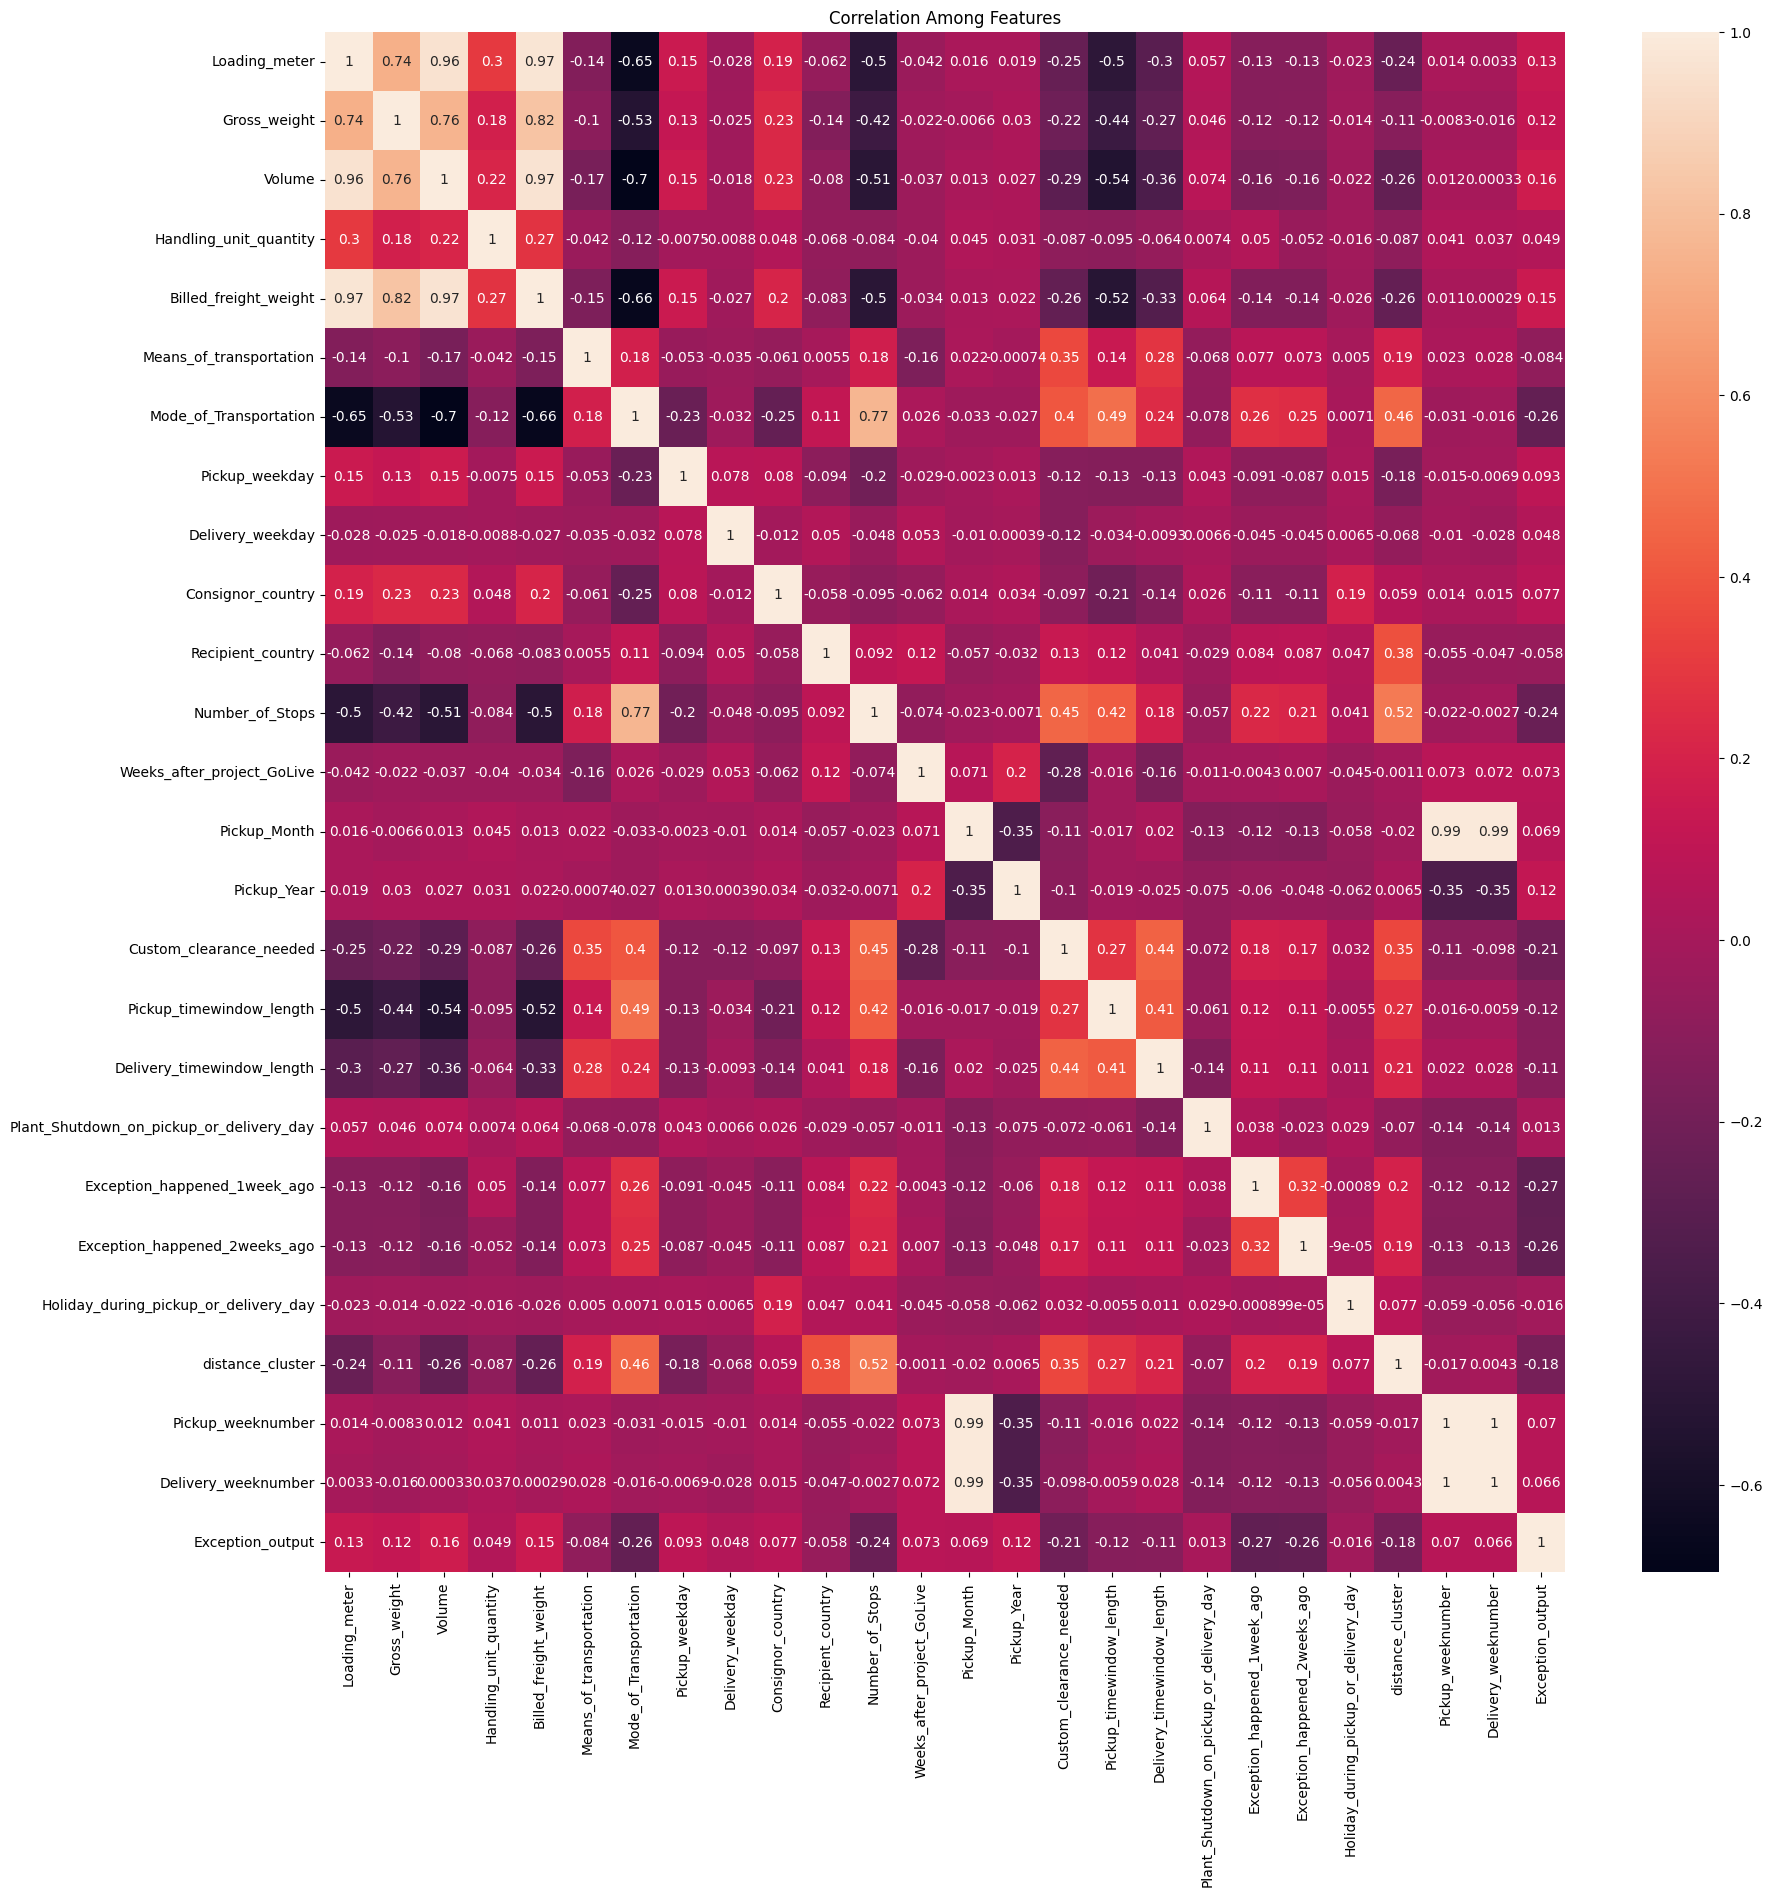

In [7]:
# Heat-Map for Showing Correlation Among Features

To_Visualize_Data['Exception_output']=To_Visualize_Data['Exception_output'].replace({'Red':'0', 'Good':'1'})
To_Visualize_Data['Exception_output'] = pd.to_numeric(To_Visualize_Data['Exception_output'], errors='coerce')
plt.figure(figsize=(20,20))
plt.title('Correlation Among Features')
sns.heatmap(To_Visualize_Data.corr(numeric_only=True), annot=True)

In [8]:
# Displaying Correlation Values for Exception_output w.r.t Other Features

Corr_Matrix = To_Visualize_Data.corr(numeric_only=True)
Corr_with_Exception_Output = Corr_Matrix['Exception_output'].sort_values(ascending=False)
print(Corr_with_Exception_Output)

Exception_output                            1.000000
Volume                                      0.159235
Billed_freight_weight                       0.147291
Loading_meter                               0.134672
Gross_weight                                0.120942
Pickup_Year                                 0.118513
Pickup_weekday                              0.093185
Consignor_country                           0.076797
Weeks_after_project_GoLive                  0.073421
Pickup_weeknumber                           0.069993
Pickup_Month                                0.068919
Delivery_weeknumber                         0.065854
Handling_unit_quantity                      0.049233
Delivery_weekday                            0.048361
Plant_Shutdown_on_pickup_or_delivery_day    0.012813
Holiday_during_pickup_or_delivery_day      -0.016471
Recipient_country                          -0.058460
Means_of_transportation                    -0.083706
Delivery_timewindow_length                 -0.

**Spliting the Dataset into Features and Target Variable**

In [9]:
X = Supply_Chain_Data.drop('Exception_output', axis=1)
y = Supply_Chain_Data['Exception_output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, stratify=y,random_state=42)

In [10]:
# Checking the Equal Percentage of Both Output Classes

print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))


Training set class distribution:
Exception_output
Good    0.87222
Red     0.12778
Name: proportion, dtype: float64

Test set class distribution:
Exception_output
Good    0.8723
Red     0.1277
Name: proportion, dtype: float64


**Model Selection and Train Model**

In [11]:
Model = RandomForestClassifier(n_estimators=10, random_state=42)
Model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

**Making Predictions on the Test Dataset**

In [12]:
y_pred = Model.predict(X_test)

**Evaluation of the Model**

Accuracy: 0.9760694620923338

Precision: 0.9769047619047619

Recall: 0.9961155620296188

F1 Score: 0.9864166366149778

Classification Report :
               precision    recall  f1-score   support

        Good       0.98      1.00      0.99      4119
         Red       0.97      0.84      0.90       603

    accuracy                           0.98      4722
   macro avg       0.97      0.92      0.94      4722
weighted avg       0.98      0.98      0.98      4722



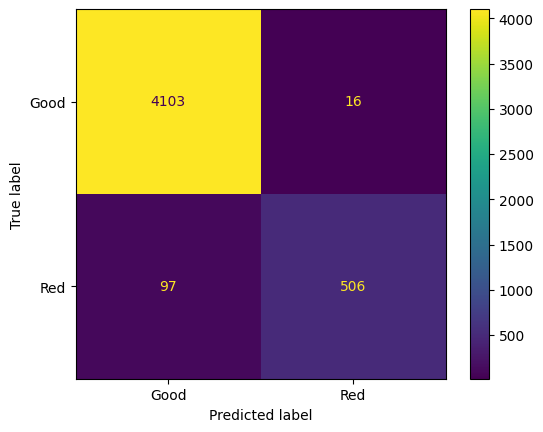

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,pos_label='Good')
recall = recall_score(y_test, y_pred,pos_label='Good')
f1 = f1_score(y_test, y_pred,pos_label='Good')
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}\n')
print(f'Precision: {precision}\n')
print(f'Recall: {recall}\n')
print(f'F1 Score: {f1}\n')
print(f'Classification Report :\n {class_report}')

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(Model, X_test, y_test)

**Checking Important Features from the Model**

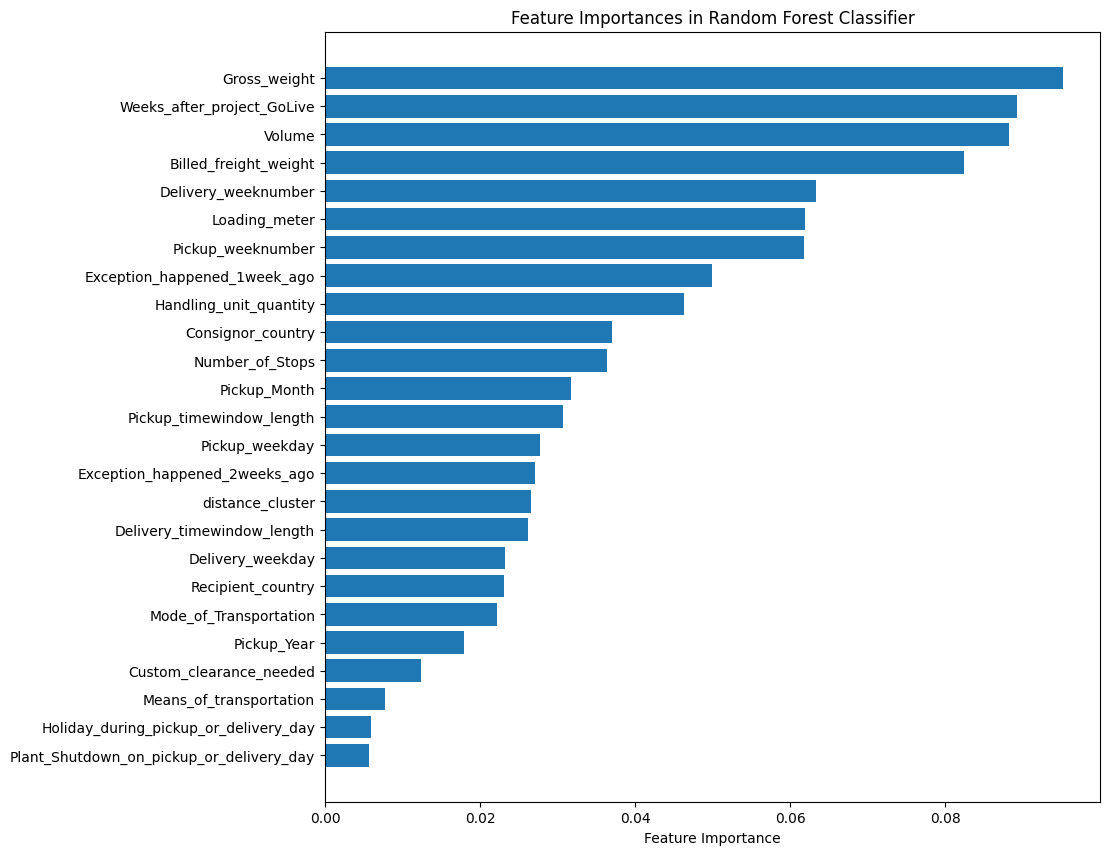

In [14]:
feature_importances = Model.feature_importances_
features = X.columns

Feature_Data = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
Feature_Data = Feature_Data.sort_values(by='Importance', ascending=False)

# Plotting the Feature Importances
plt.figure(figsize=(10, 10))
plt.barh(Feature_Data['Feature'], Feature_Data['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

**Preparing Dataset to Train New Model on the Basis of High Feature Importance**

In [15]:
# Splitting Dataset into Training and Testing Dataset

X1 = Supply_Chain_Data.drop(['Means_of_transportation', 'Mode_of_Transportation', 'Pickup_weekday','Delivery_weekday', 'Number_of_Stops','Weeks_after_project_GoLive', 'Custom_clearance_needed','Pickup_timewindow_length', 'Delivery_timewindow_length','Plant_Shutdown_on_pickup_or_delivery_day','Holiday_during_pickup_or_delivery_day','Pickup_Month','Pickup_Year','Pickup_weeknumber','Delivery_weeknumber','Exception_output'], axis=1)
y1 = Supply_Chain_Data['Exception_output']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.05, stratify=y1,random_state=42)

**Exporting Training and Test Data Separately to CSV Files**

In [16]:
# Exporting the Training Dataset to CSV File

Export_Training_Data = X1_train.copy()
Export_Training_Data["Exception_output"] = y1_train.values

Export_Training_Data['Consignor_country'] = Export_Training_Data['Consignor_country'].astype(int)
Export_Training_Data['Recipient_country'] = Export_Training_Data['Recipient_country'].astype(int)
Export_Training_Data['Exception_happened_1week_ago'] = Export_Training_Data['Exception_happened_1week_ago'].astype(int)
Export_Training_Data['Exception_happened_2weeks_ago'] = Export_Training_Data['Exception_happened_2weeks_ago'].astype(int)
Export_Training_Data['distance_cluster'] = Export_Training_Data['distance_cluster'].astype(int)

Export_Training_Data['Consignor_country'] = Export_Training_Data['Consignor_country'].astype(str)
Export_Training_Data['Recipient_country'] = Export_Training_Data['Recipient_country'].astype(str)
Export_Training_Data['Exception_happened_1week_ago'] = Export_Training_Data['Exception_happened_1week_ago'].astype(str)
Export_Training_Data['Exception_happened_2weeks_ago'] = Export_Training_Data['Exception_happened_2weeks_ago'].astype(str)
Export_Training_Data['distance_cluster'] = Export_Training_Data['distance_cluster'].astype(str)

Export_Training_Data['Consignor_country'] = Export_Training_Data['Consignor_country'].replace({'1':'AT','2':'BE','3':'BG','4':'CH','5':'CZ','6':'DE','7':'ES','8':'FR','9':'GB','10':'HU','11':'IT','12':'L','13':'LU','14':'MA','15':'MD','16':'MK','17':'NL','18':'PL','19':'PT','20':'RO','21':'RS','22':'RU','23':'SE','24':'SI','25':'SK','26':'TR','27':'UA'})
Export_Training_Data['Recipient_country'] = Export_Training_Data['Recipient_country'].replace({'1':'AT','2':'BE','3':'BG','4':'CH','5':'CZ','6':'DE','7':'ES','8':'FR','9':'GB','10':'HU','11':'IT','12':'L','13':'LU','14':'MA','15':'MD','16':'MK','17':'NL','18':'PL','19':'PT','20':'RO','21':'RS','22':'RU','23':'SE','24':'SI','25':'SK','26':'TR','27':'UA'})
Export_Training_Data['Exception_happened_1week_ago'] = Export_Training_Data['Exception_happened_1week_ago'].replace({'0':'False','1': 'True'})
Export_Training_Data['Exception_happened_2weeks_ago'] = Export_Training_Data['Exception_happened_2weeks_ago'].replace({'0':'False','1': 'True'})
Export_Training_Data['distance_cluster'] = Export_Training_Data['distance_cluster'].replace({'1':'0-50 km','2': '50-200 km','3': '200-500 km','4': '500-800 km','5': '800-1300 km', '6':'1300-1800 km','7':'>1800 km'})

Export_Training_Data.to_csv('Data/Training_Data.csv', index=True)

Export_Training_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89701 entries, 20950 to 34122
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Loading_meter                  89701 non-null  float64
 1   Gross_weight                   89701 non-null  float64
 2   Volume                         89701 non-null  float64
 3   Handling_unit_quantity         89701 non-null  float64
 4   Billed_freight_weight          89701 non-null  float64
 5   Consignor_country              89701 non-null  object 
 6   Recipient_country              89701 non-null  object 
 7   Exception_happened_1week_ago   89701 non-null  object 
 8   Exception_happened_2weeks_ago  89701 non-null  object 
 9   distance_cluster               89701 non-null  object 
 10  Exception_output               89701 non-null  object 
dtypes: float64(5), object(6)
memory usage: 8.2+ MB


In [17]:
# Exporting the Test Dataset to CSV File

Export_Test_Data = X1_test.copy()
Export_Test_Data["Exception_output"] = y1_test.values

Export_Test_Data['Consignor_country'] = Export_Test_Data['Consignor_country'].astype(int)
Export_Test_Data['Recipient_country'] = Export_Test_Data['Recipient_country'].astype(int)
Export_Test_Data['Exception_happened_1week_ago'] = Export_Test_Data['Exception_happened_1week_ago'].astype(int)
Export_Test_Data['Exception_happened_2weeks_ago'] = Export_Test_Data['Exception_happened_2weeks_ago'].astype(int)
Export_Test_Data['distance_cluster'] = Export_Test_Data['distance_cluster'].astype(int)

Export_Test_Data['Consignor_country'] = Export_Test_Data['Consignor_country'].astype(str)
Export_Test_Data['Recipient_country'] = Export_Test_Data['Recipient_country'].astype(str)
Export_Test_Data['Exception_happened_1week_ago'] = Export_Test_Data['Exception_happened_1week_ago'].astype(str)
Export_Test_Data['Exception_happened_2weeks_ago'] = Export_Test_Data['Exception_happened_2weeks_ago'].astype(str)
Export_Test_Data['distance_cluster'] = Export_Test_Data['distance_cluster'].astype(str)

Export_Test_Data['Consignor_country'] = Export_Test_Data['Consignor_country'].replace({'1':'AT','2':'BE','3':'BG','4':'CH','5':'CZ','6':'DE','7':'ES','8':'FR','9':'GB','10':'HU','11':'IT','12':'L','13':'LU','14':'MA','15':'MD','16':'MK','17':'NL','18':'PL','19':'PT','20':'RO','21':'RS','22':'RU','23':'SE','24':'SI','25':'SK','26':'TR','27':'UA'})
Export_Test_Data['Recipient_country'] = Export_Test_Data['Recipient_country'].replace({'1':'AT','2':'BE','3':'BG','4':'CH','5':'CZ','6':'DE','7':'ES','8':'FR','9':'GB','10':'HU','11':'IT','12':'L','13':'LU','14':'MA','15':'MD','16':'MK','17':'NL','18':'PL','19':'PT','20':'RO','21':'RS','22':'RU','23':'SE','24':'SI','25':'SK','26':'TR','27':'UA'})
Export_Test_Data['Exception_happened_1week_ago'] = Export_Test_Data['Exception_happened_1week_ago'].replace({'0':'False','1': 'True'})
Export_Test_Data['Exception_happened_2weeks_ago'] = Export_Test_Data['Exception_happened_2weeks_ago'].replace({'0':'False','1': 'True'})
Export_Test_Data['distance_cluster'] = Export_Test_Data['distance_cluster'].replace({'1':'0-50 km','2': '50-200 km','3': '200-500 km','4': '500-800 km','5': '800-1300 km', '6':'1300-1800 km','7':'>1800 km'})

Export_Test_Data.to_csv('Data/Test_Data.csv', index=True)

Export_Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4722 entries, 54500 to 70556
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Loading_meter                  4722 non-null   float64
 1   Gross_weight                   4722 non-null   float64
 2   Volume                         4722 non-null   float64
 3   Handling_unit_quantity         4722 non-null   float64
 4   Billed_freight_weight          4722 non-null   float64
 5   Consignor_country              4722 non-null   object 
 6   Recipient_country              4722 non-null   object 
 7   Exception_happened_1week_ago   4722 non-null   object 
 8   Exception_happened_2weeks_ago  4722 non-null   object 
 9   distance_cluster               4722 non-null   object 
 10  Exception_output               4722 non-null   object 
dtypes: float64(5), object(6)
memory usage: 442.7+ KB


**New Model Selection and Initiate Training**

In [18]:
Model1 = RandomForestClassifier(n_estimators=10, random_state=42)
Model1.fit(X1_train, y1_train)

RandomForestClassifier(n_estimators=10, random_state=42)

**Making Predictions on the Test Dataset by New Model**

In [19]:
y1_pred = Model1.predict(X1_test)

**Evaluation of the New Model**

Accuracy: 0.9633629817873782

Precision: 0.9711079274116523

Recall: 0.9873755765962612

F1 Score: 0.9791741904417961

Classification Report : 
              precision    recall  f1-score   support

        Good       0.97      0.99      0.98      4119
         Red       0.90      0.80      0.85       603

    accuracy                           0.96      4722
   macro avg       0.94      0.89      0.91      4722
weighted avg       0.96      0.96      0.96      4722



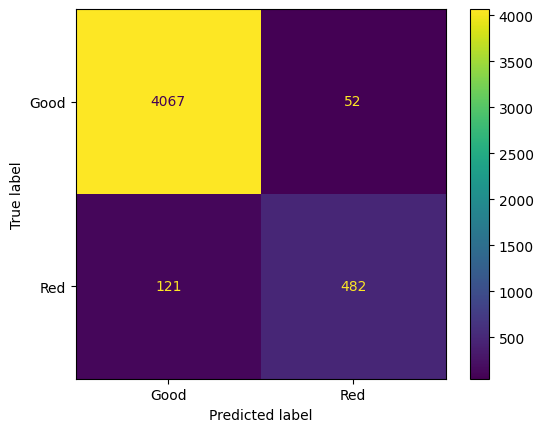

In [20]:
accuracy = accuracy_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred,pos_label='Good')
recall = recall_score(y1_test, y1_pred,pos_label='Good')
f1 = f1_score(y1_test, y1_pred,pos_label='Good')
class_report = classification_report(y1_test, y1_pred)

print(f'Accuracy: {accuracy}\n')
print(f'Precision: {precision}\n')
print(f'Recall: {recall}\n')
print(f'F1 Score: {f1}\n')
print(f'Classification Report : \n{class_report}')

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(Model1, X1_test, y1_test)

**Exporting the New Model as a File**

In [21]:
joblib.dump(Model1, 'ML_Model.joblib')

['ML_Model.joblib']